In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings("ignore")

# EDA and Data Preprocessing

In [2]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [3]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [4]:
df.shape

(3000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['Agency_Code'].value_counts()

EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64

In [8]:
pd.options
(df[df['Channel']=='Online']['Age']).value_counts()


36    999
31    123
48    107
30     95
35     93
     ... 
84      1
11      1
77      1
79      1
83      1
Name: Age, Length: 67, dtype: int64

In [9]:
df['Duration'].value_counts()

 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64

In [10]:
df['Sales'].value_counts()

20.00     225
10.00     163
22.00      79
252.85     60
216.00     59
         ... 
199.00      1
177.00      1
171.00      1
206.60      1
271.00      1
Name: Sales, Length: 380, dtype: int64

In [11]:
df['Channel'].value_counts()

Online     2954
Offline      46
Name: Channel, dtype: int64

In [12]:
(df[df['Channel']=='Online']['Claimed']).value_counts()

No     2047
Yes     907
Name: Claimed, dtype: int64

In [13]:
(df[df['Channel']=='Offline']['Claimed']).value_counts()

No     29
Yes    17
Name: Claimed, dtype: int64

In [14]:
df['Product Name'].value_counts()

Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [15]:
df['Destination'].value_counts()

ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64

In [16]:
df['Type'].value_counts()

Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64

In [17]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [18]:
df['Product Name']=df['Product Name'].astype('category')
df['Claimed']=df['Claimed'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null category
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null category
Destination     3000 non-null object
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 193.8+ KB


In [19]:
df['Product Name_cat']=df['Product Name'].cat.codes
df['Claimed_cat']=df['Claimed'].cat.codes
df=df.drop('Claimed',axis=1)
df.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination,Product Name_cat,Claimed_cat
0,48,C2B,Airlines,0.70,Online,7,2.51,Customised Plan,ASIA,2,0
1,36,EPX,Travel Agency,0.00,Online,34,20.00,Customised Plan,ASIA,2,0
2,39,CWT,Travel Agency,5.94,Online,3,9.90,Customised Plan,Americas,2,0
3,36,EPX,Travel Agency,0.00,Online,4,26.00,Cancellation Plan,ASIA,1,0
4,33,JZI,Airlines,6.30,Online,53,18.00,Bronze Plan,ASIA,0,0


In [20]:
df1= pd.get_dummies(df,drop_first=True)
df1.head()

,Age,Commision,Duration,Sales,Product Name_cat,Claimed_cat,Agency_Code_CWT,Agency_Code_EPX,Agency_Code_JZI,Type_Travel Agency,Channel_Online,Product Name_Cancellation Plan,Product Name_Customised Plan,Product Name_Gold Plan,Product Name_Silver Plan,Destination_Americas,Destination_EUROPE
0,48,0.70,7,2.51,2,0,0,0,0,0,1,0,1,0,0,0,0
1,36,0.00,34,20.00,2,0,0,1,0,1,1,0,1,0,0,0,0
2,39,5.94,3,9.90,2,0,1,0,0,1,1,0,1,0,0,1,0
3,36,0.00,4,26.00,1,0,0,1,0,1,1,1,0,0,0,0,0
4,33,6.30,53,18.00,0,0,0,0,1,0,1,0,0,0,0,0,0


##### Univariate Analysis

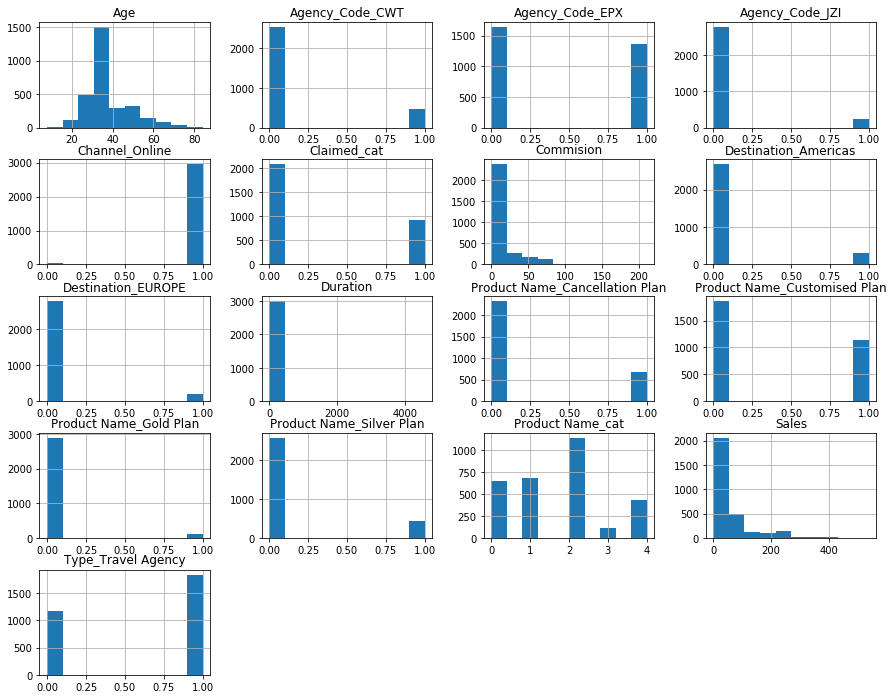

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,12

df1.hist();

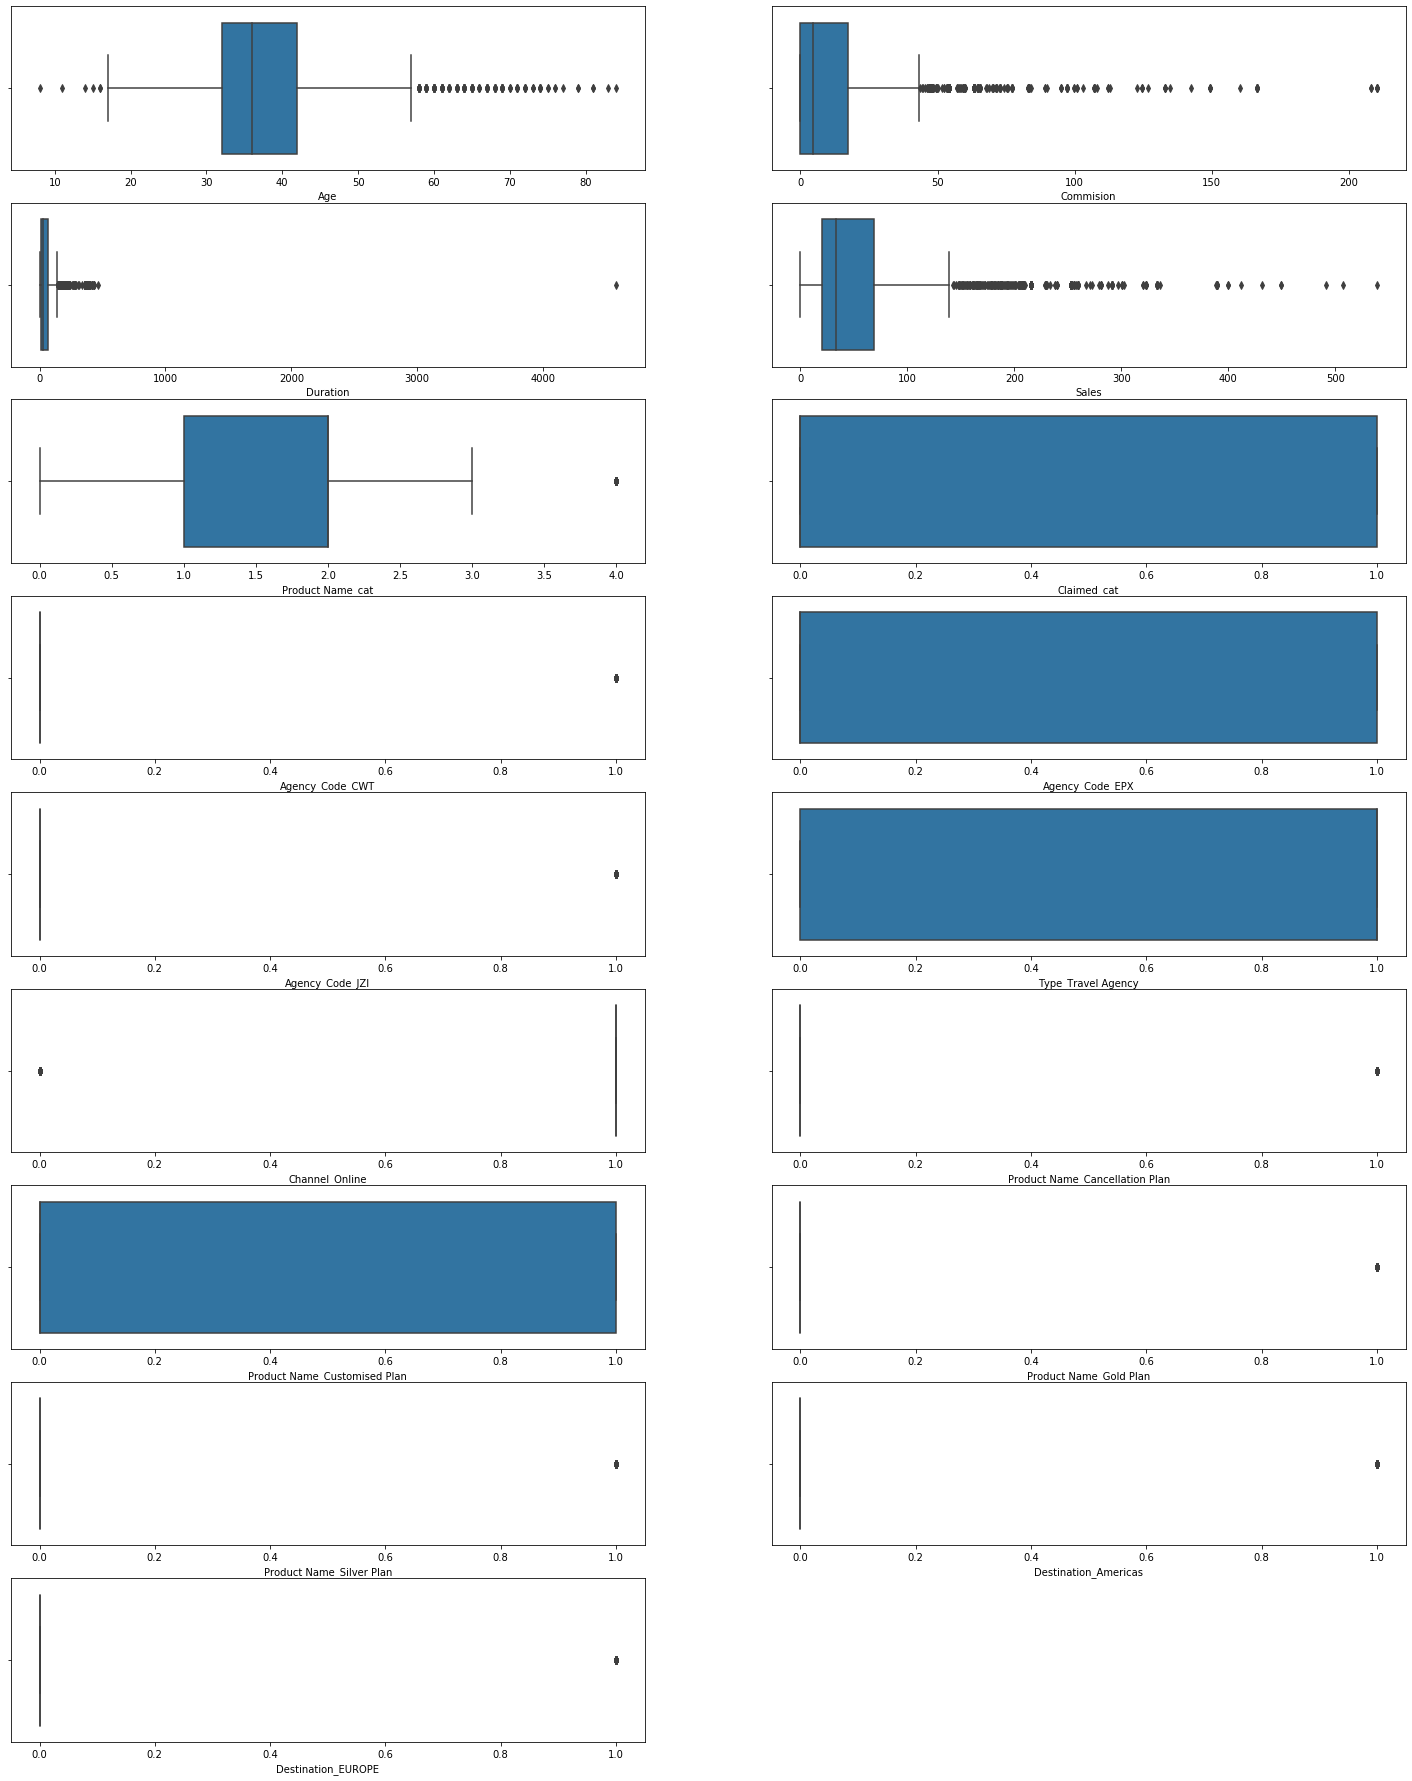

In [22]:
fig = plt.figure(figsize=(25,50))
for i in range(0,len(df1.columns)):
    ax=fig.add_subplot(14,2,i+1)
    sns.boxplot(df1[df1.columns[i]])

##### Multivariate Analysis

<Figure size 1440x720 with 0 Axes>

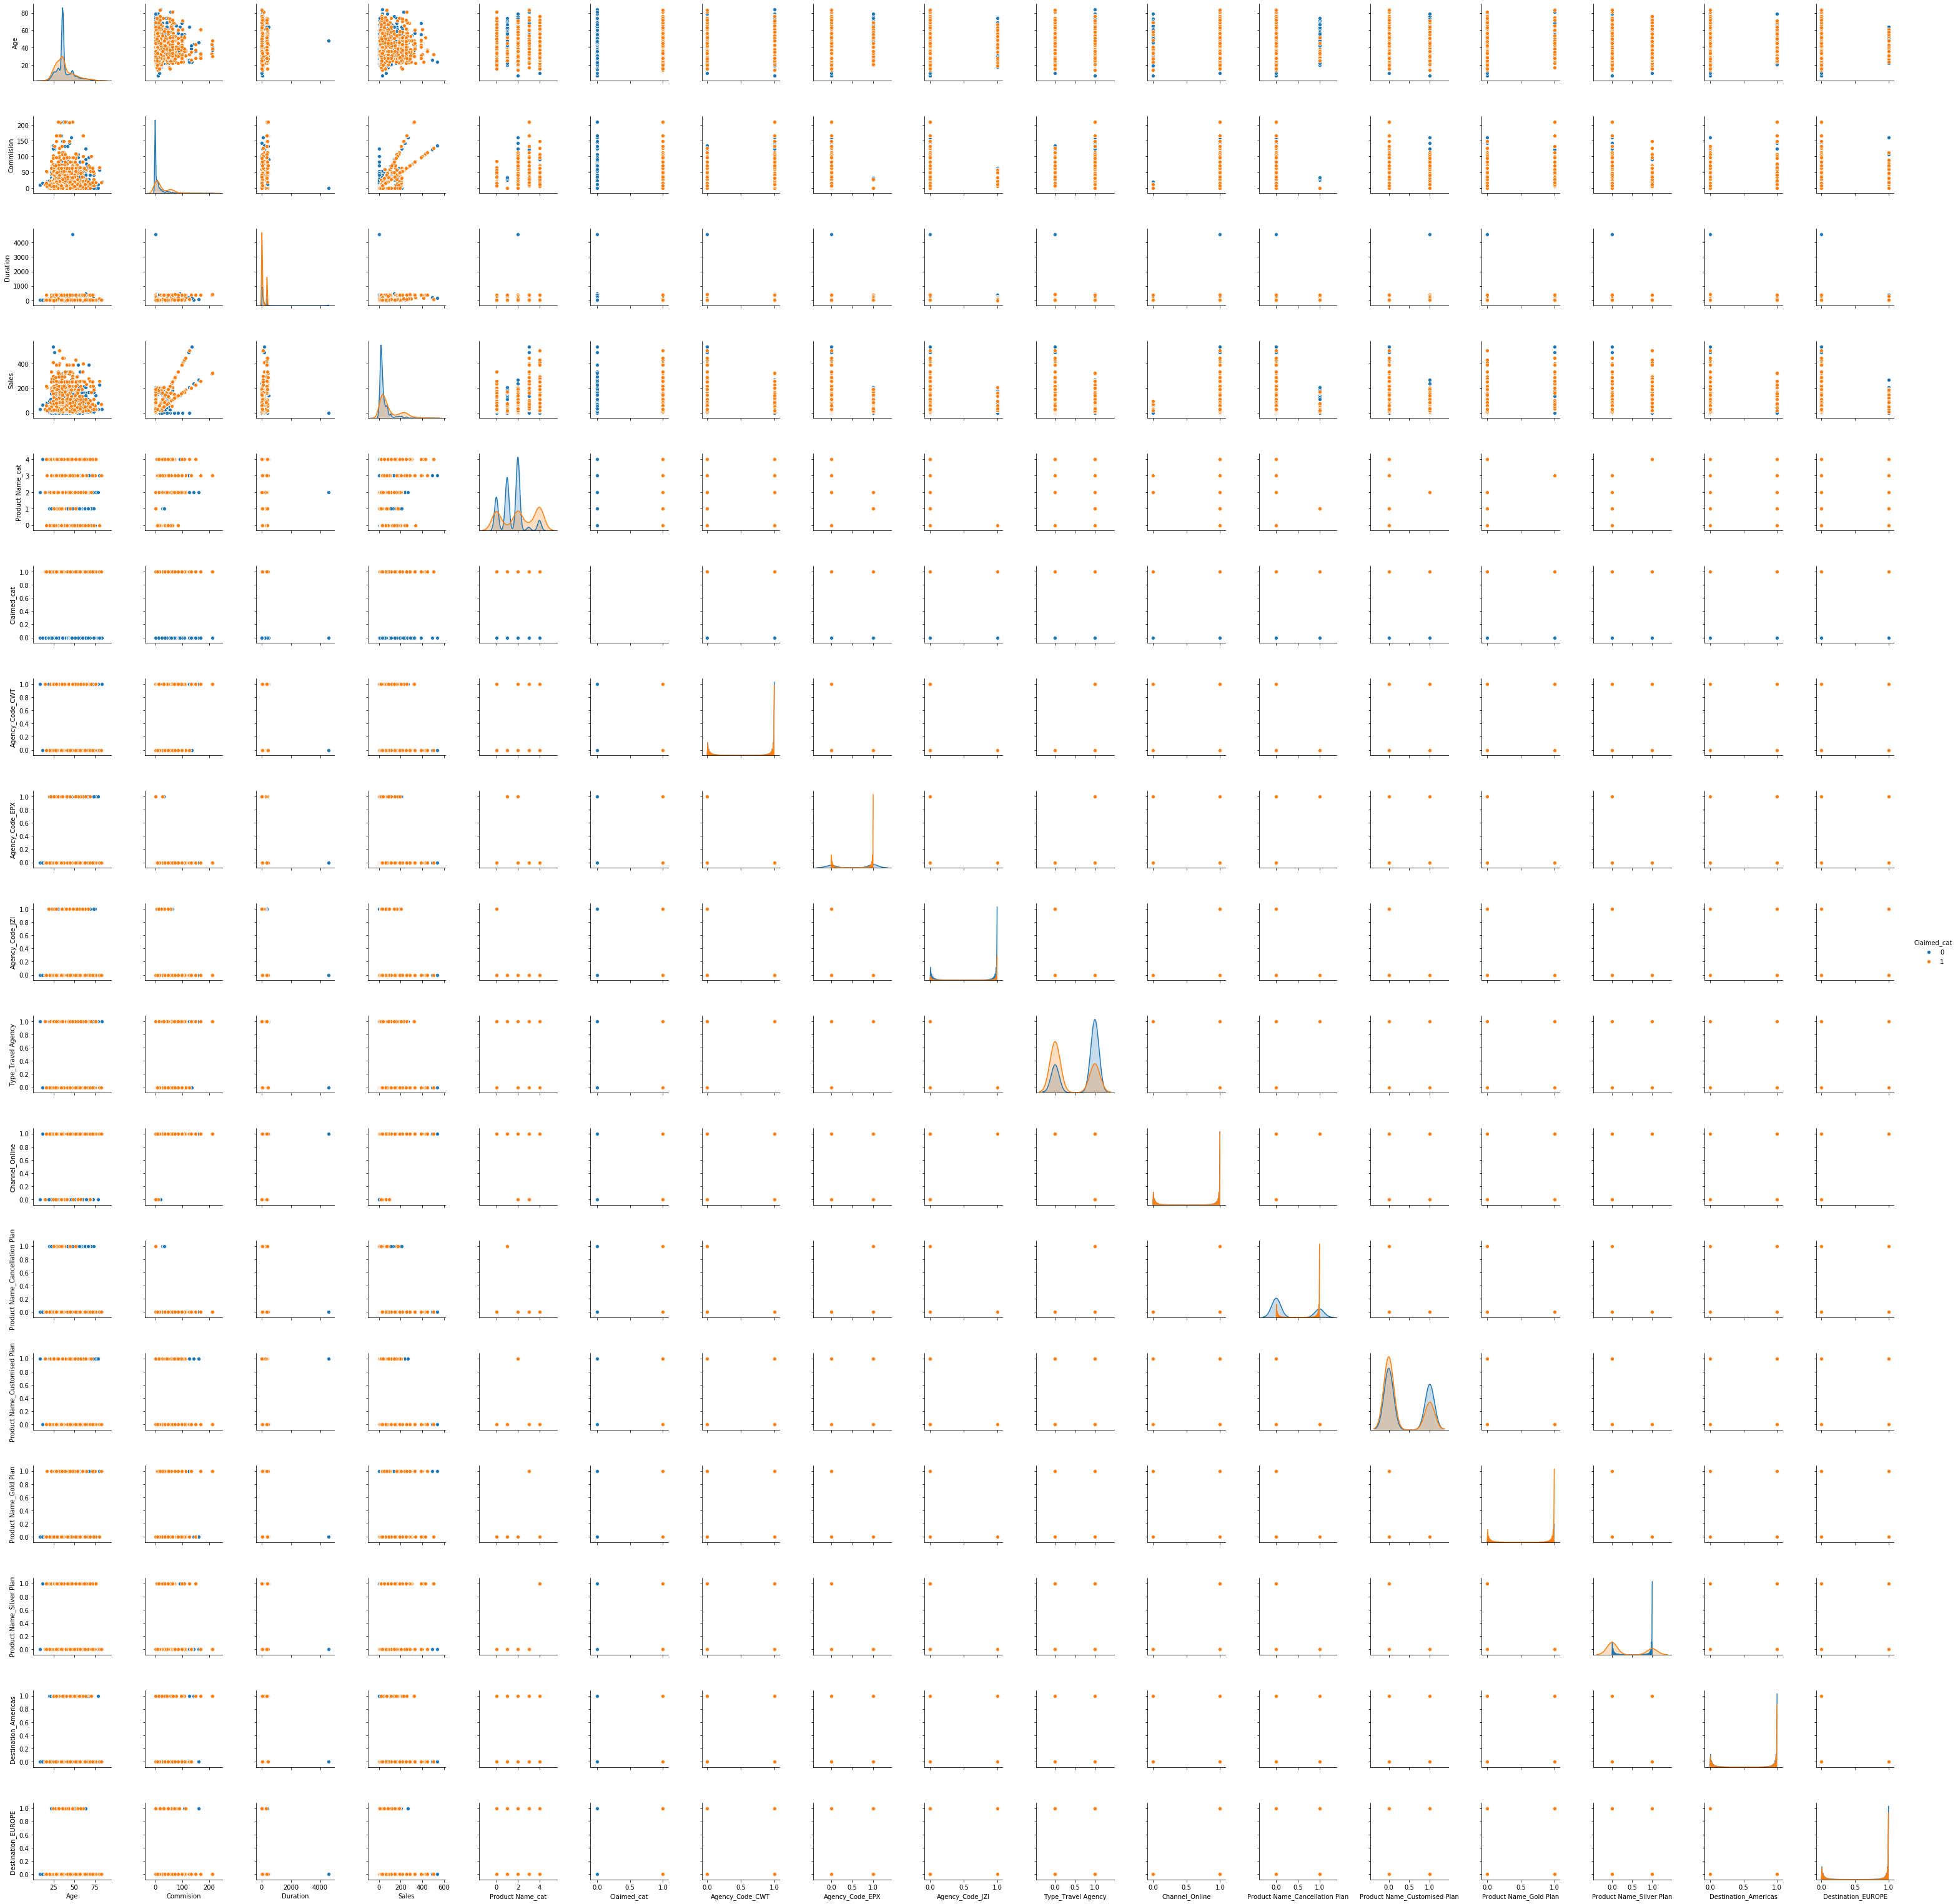

In [23]:
plt.figure(figsize=(20,10))
sns.pairplot(df1,hue="Claimed_cat")

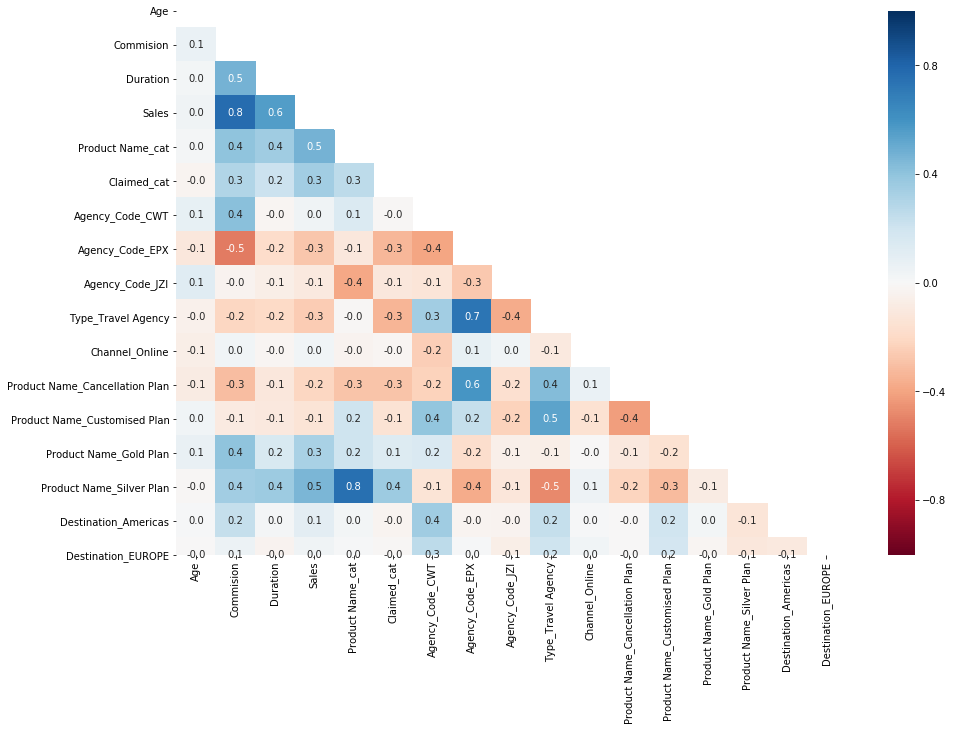

In [24]:
corr=df1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(15, 10))
sns.heatmap(df1.corr(), fmt='.1f',cmap='RdBu',vmin=-1,vmax=1,mask=mask,annot=True)
plt.show()

#### Data Preprocessing

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
lr,ur=remove_outlier(df1["Age"])
df1["Age"]=np.where(df1["Age"]>ur,ur,df1["Age"])
df1["Age"]=np.where(df1["Age"]<lr,lr,df1["Age"])
lr,ur=remove_outlier(df1["Commision"])
df1["Commision"]=np.where(df1["Commision"]>ur,ur,df1["Commision"])
df1["Commision"]=np.where(df["Commision"]<lr,lr,df1["Commision"])
lr,ur=remove_outlier(df1["Duration"])
df1["Duration"]=np.where(df1["Duration"]>ur,ur,df1["Duration"])
df1["Duration"]=np.where(df1["Duration"]<lr,lr,df1["Duration"])
lr,ur=remove_outlier(df1["Sales"])
df1["Sales"]=np.where(df1["Sales"]>ur,ur,df1["Sales"])
df1["Sales"]=np.where(df1["Sales"]<lr,lr,df1["Sales"])


In [27]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                               10.000
Commision                         17.235
Duration                          52.000
Sales                             49.000
Product Name_cat                   1.000
Claimed_cat                        1.000
Agency_Code_CWT                    0.000
Agency_Code_EPX                    1.000
Agency_Code_JZI                    0.000
Type_Travel Agency                 1.000
Channel_Online                     0.000
Product Name_Cancellation Plan     0.000
Product Name_Customised Plan       1.000
Product Name_Gold Plan             0.000
Product Name_Silver Plan           0.000
Destination_Americas               0.000
Destination_EUROPE                 0.000
dtype: float64


In [28]:
df1.shape

(3000, 17)

In [29]:
df1.isnull().sum()

Age                               0
Commision                         0
Duration                          0
Sales                             0
Product Name_cat                  0
Claimed_cat                       0
Agency_Code_CWT                   0
Agency_Code_EPX                   0
Agency_Code_JZI                   0
Type_Travel Agency                0
Channel_Online                    0
Product Name_Cancellation Plan    0
Product Name_Customised Plan      0
Product Name_Gold Plan            0
Product Name_Silver Plan          0
Destination_Americas              0
Destination_EUROPE                0
dtype: int64

#### spliting the data into Train and Test 

In [30]:
X = df1.drop("Claimed_cat" , axis=1)

y = df1.Claimed_cat

In [31]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=10,stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2100, 16)
(900, 16)
(2100,)
(900,)


In [32]:
df1.Claimed_cat.value_counts()

0    2076
1     924
Name: Claimed_cat, dtype: int64

#### From the above result we can find that it is a imbalanced dataset

# CART Model

In [33]:
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state=1)

In [34]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [35]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                     Imp
Age                             0.177179
Commision                       0.071685
Duration                        0.272730
Sales                           0.165480
Product Name_cat                0.189754
Agency_Code_CWT                 0.001679
Agency_Code_EPX                 0.006846
Agency_Code_JZI                 0.032767
Type_Travel Agency              0.008186
Channel_Online                  0.004585
Product Name_Cancellation Plan  0.040589
Product Name_Customised Plan    0.000000
Product Name_Gold Plan          0.001334
Product Name_Silver Plan        0.000000
Destination_Americas            0.007579
Destination_EUROPE              0.019607


In [36]:
y_predict = dt_model.predict(X_test)

In [37]:
dt_model.score(X_train,y_train)

0.9880952380952381

In [38]:
dt_model.score(X_test,y_test)

0.6855555555555556

#### From the above accuracy scores we can clearly get an  idea as the model is overfitting, so we need to do gridsearchcv to overcome this isuue

In [39]:
from sklearn.model_selection import GridSearchCV
param_grid ={'criterion':['gini', 'entropy'],
         'max_depth':[5,6,7,9,10,11,13,15,16],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
         "min_samples_leaf":[2,3,4,5,6,7,8,9,10],
    #'max_depth': [7, 10],
    'max_features': [4, 6],
    #'min_samples_leaf': [50, 100],
    #'min_samples_split': [150, 300],

}

DT = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=DT, param_grid = param_grid, cv = 5,verbose=1,n_jobs=-1)

In [40]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 343 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 842 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 1542 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 3206 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5406 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 8006 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 11006 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 14406 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 14580 out of 14580 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 9, 10, 11, 13, 15, 16],
       

In [41]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [42]:
reg_dt_model = DecisionTreeClassifier(criterion='gini',max_depth= 6,min_samples_leaf=6,min_samples_split=6,max_features=4)
reg_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

#### Accuracy Score for Decision Tree

In [44]:
reg_dt_model.score(X_train,y_train)

0.7976190476190477

In [45]:
reg_dt_model.score(X_test,y_test)

0.7566666666666667

#### From the above accuracy scores we can find that the model overfitting isuue is resolved

#### Confusion Matrix for Decision Tree 

In [46]:
print(metrics.confusion_matrix(y_test, ytest_predict))

[[521 102]
 [117 160]]


In [47]:
print(metrics.confusion_matrix(y_train, ytrain_predict))

[[1279  174]
 [ 251  396]]


#### Classification report for Decision tree

In [48]:
print(metrics.classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       623
           1       0.61      0.58      0.59       277

    accuracy                           0.76       900
   macro avg       0.71      0.71      0.71       900
weighted avg       0.75      0.76      0.75       900



In [49]:
print(metrics.classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1453
           1       0.69      0.61      0.65       647

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [50]:
#cart Test performance metrics
cart_test_recall=recall_score(y_test, ytest_predict,average='macro')
cart_test_precision=precision_score(y_test, ytest_predict,average='macro')
cart_test_f1=f1_score(y_test, ytest_predict,average='macro')
cart_test_accuracy=accuracy_score(y_test, ytest_predict)

NameError: name 'recall_score' is not defined

In [ ]:
#cart train perormance metrics
cart_train_precision=precision_score(y_train, ytrain_predict,average='macro')
cart_train_recall=recall_score(y_train, ytrain_predict,average='macro')
cart_train_f1=f1_score(y_train, ytrain_predict,average='macro')
cart_train_accuracy=accuracy_score(y_train, ytrain_predict)

#### AUC Score and ROC Curve for Decision Tree 

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 501)
rfcl = rfcl.fit(X_train,y_train)

In [ ]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100],
    'min_samples_split': [150, 300],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search2= GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5,n_jobs=-1,verbose=1)

In [ ]:
grid_search2.fit(X_train,y_train)

In [ ]:
grid_search2.best_params_

In [ ]:
rfcl_model = RandomForestClassifier(max_depth= 7,min_samples_leaf=50,min_samples_split=150,max_features=6,n_estimators=501)
rfcl_model.fit(X_train,y_train)

In [ ]:
ytrain_predict2 = rfcl_model.predict(X_train)
ytest_predict2 = rfcl_model.predict(X_test)

#### Accuracy Score for Random Forest 

In [ ]:
rfcl_model.score(X_test,y_test)

In [ ]:
rfcl_model.score(X_train,y_train)

#### Confusion matrix for Random Forest

In [ ]:
print(metrics.confusion_matrix(y_test, ytest_predict2))

In [ ]:
print(metrics.confusion_matrix(y_train, ytrain_predict2))

#### Classification report for Random Forest

In [ ]:
print(metrics.classification_report(y_test, ytest_predict2))

In [ ]:
print(metrics.classification_report(y_train, ytrain_predict2))

In [ ]:
#RNN Test performance metrics
rnn_test_recall=recall_score(y_test, ytest_predict2,average='macro')
rnn_test_precision=precision_score(y_test, ytest_predict2,average='macro')
rnn_test_f1=f1_score(y_test, ytest_predict2,average='macro')
rnn_test_accuracy=accuracy_score(y_test, ytest_predict2)

In [ ]:
#RNN train perormance metrics
rnn_train_precision=precision_score(y_train, ytrain_predict2,average='macro')
rnn_train_recall=recall_score(y_train, ytrain_predict2,average='macro')
rnn_train_f1=f1_score(y_train, ytrain_predict2,average='macro')
rnn_train_accuracy=accuracy_score(y_train, ytrain_predict2)


#### AUC Score and ROC score for Random Forest 

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = rfcl_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rnn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rnn_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rnn_test_fpr, rnn_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = rfcl_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rnn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rnn_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rnn_train_fpr, rnn_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# ANN Model

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaled = sc.fit_transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = sc.transform(X_test)
X_test_scaled

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=10, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [ ]:
clf.fit(X_train_scaled,y_train)

In [ ]:
param_grid = {
    'hidden_layer_sizes': [1,3,5,7,10],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    'tol': [0.0001, 0.001,0.01],
    'max_iter': [200,1000,5000]
}

clf = MLPClassifier(random_state=10)

grid_search3 = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5,verbose=1,n_jobs=-1)

In [ ]:
grid_search3.fit(X_train,y_train)

In [ ]:
grid_search3.best_params_

In [ ]:
clf_model = MLPClassifier(activation= 'logistic',hidden_layer_sizes=7,max_iter=200,solver= 'adam',tol= 0.0001)
clf_model.fit(X_train,y_train)

In [ ]:
ytrain_predict3 = clf_model.predict(X_train_scaled)
ytest_predict3 = clf_model.predict(X_test_scaled)

#### AccuracyScore for ANN 

In [ ]:
clf_model.score(X_test_scaled,y_test)

In [ ]:
clf_model.score(X_train_scaled,y_train)

#### Confusion Matrix for ANN

In [ ]:
print(metrics.confusion_matrix(y_test, ytest_predict3))

In [ ]:
print(metrics.confusion_matrix(y_train, ytrain_predict3))

#### Classification report for ANN

In [ ]:
print(metrics.classification_report(y_test, ytest_predict3))

In [ ]:
print(metrics.classification_report(y_train, ytrain_predict3))

In [ ]:
from sklearn.metrics import recall_score
ann_test_recall=recall_score(y_test, ytest_predict3,average='macro')
ann_test_recall

In [ ]:
from sklearn.metrics import precision_score
ann_test_precision=precision_score(y_test, ytest_predict3,average='macro')
ann_test_precision

In [ ]:
from sklearn.metrics import f1_score
ann_test_f1=f1_score(y_test, ytest_predict3,average='macro')
ann_test_f1

In [ ]:
from sklearn.metrics import accuracy_score
ann_test_accuracy=accuracy_score(y_test, ytest_predict3)
ann_test_accuracy

In [ ]:
from sklearn.metrics import precision_score
ann_train_precision=precision_score(y_train, ytrain_predict3,average='macro')
ann_train_precision

In [ ]:
from sklearn.metrics import recall_score
ann_train_recall=recall_score(y_train, ytrain_predict3,average='macro')
ann_train_recall

In [ ]:
from sklearn.metrics import f1_score
ann_train_f1=f1_score(y_train, ytrain_predict3,average='macro')
ann_train_f1

In [ ]:
from sklearn.metrics import accuracy_score
ann_train_accuracy=accuracy_score(y_train, ytrain_predict3)
ann_train_accuracy

#### AUC Score and ROC Curve for ANN

In [ ]:
# predict probabilities
probs = clf_model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ANN_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % ANN_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_test_fpr, ann_test_tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# predict probabilities
probs = clf_model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ANN_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ANN_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_train_fpr,ann_train_tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#  Model Comparison

### Accuracy Score for all models

In [ ]:
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
for i in range(0, len(models)):
    if models[i]==clf_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train_scaled)),1)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test_scaled)),1))  )
    elif models[i]==reg_dt_model:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test)),2))  )
    else:
        print('Accuracy Score for Train set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_train, models[i].predict(X_train)),2)))
        print('Accuracy Score for Test set for {} is {}'.format(models_names[models[i]],
                                                             round(accuracy_score(y_test, models[i].predict(X_test)),2))  ) 

### Confusion Matrix for all Models

In [ ]:
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
fig=plt.figure(figsize=(10,10))
for i in range(0, len(models)):
    ax=fig.add_subplot(2,3,i+1)
    if models[i]==clf_model: 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train_scaled)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    elif models[i]==rfcl_model : 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(y_train, models[i].predict(X_train)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()

In [ ]:
models=[reg_dt_model,clf_model,rfcl_model]
models_names={reg_dt_model:'DecisionTreeClassifier',clf_model:'ANN',rfcl_model:'RandomForestClassifier'}
fig=plt.figure(figsize=(10,10))
for i in range(0, len(models)):
    ax=fig.add_subplot(2,3,i+1)
    if models[i]==clf_model: 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test_scaled)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    elif models[i]==rfcl_model : 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
    else: 
        sns.heatmap(confusion_matrix(y_test, models[i].predict(X_test)),annot=True, fmt='.1f',cbar=False,cmap='YlOrBr')
        ax.set_title(models_names[models[i]],color='Red')
        plt.ylabel('Actual Value')
        plt.xlabel('Predicted Value')
        
    #plt.title('Confusion Matrix for Predictions on Test set')
plt.tight_layout()


### Classification report for all Models

In [ ]:
index=['Accuracy','AUC','Precision','Recall','F1 Score']
data=pd.DataFrame({'ANN Test':[ann_test_accuracy,ANN_auc,ann_test_precision,ann_test_recall,ann_test_f1],
                  'ANN Train':[ann_train_accuracy,ANN_train_auc,ann_train_precision,ann_train_recall,ann_train_f1],
                  'RNN Test':[rnn_test_accuracy,rnn_test_auc,ann_test_precision,rnn_test_recall,rnn_test_f1],
                  'RNN Train':[rnn_train_accuracy,rnn_train_auc,ann_train_precision,rnn_train_recall,rnn_train_f1],
                  'CART Test':[cart_test_accuracy,cart_test_auc,cart_test_precision,cart_test_recall,cart_test_f1],
                  'CART Train':[cart_train_accuracy,cart_train_auc,cart_train_precision,cart_train_recall,cart_train_f1]},index=index)
round(data,2)

### ROC for all Models

In [ ]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr,color='red',label='CART')
plt.plot(rnn_train_fpr,rnn_train_tpr,color='blue',label='RNN')
plt.plot(ann_train_fpr,ann_train_tpr,color='green',label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.),loc='best')

In [ ]:
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(cart_test_fpr,cart_test_tpr,color='red',label='CART')
plt.plot(rnn_test_fpr,rnn_test_tpr,color='blue',label='RNN')
plt.plot(ann_test_fpr,ann_test_tpr,color='green',label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0.,1.),loc='best')